In [221]:
import pandas as pd
import matplotlib.pyplot as plt

In [222]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [223]:
movies['title'].value_counts()

title
Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: count, Length: 9737, dtype: int64

# Feature Engineering (extracting `years`)

In [224]:
# Function to extract years
def extract_years(movie):
    """
    This function will extract the release year of the movie 
    by takes 4 digits of numerals in parentheses at the end 
    of the title. The output will be the release year of the 
    movie in integar format. If the title does not have the 
    release date, the output will be 0 as a missing value.

    movie: string
    """

    year_digits = movie.rstrip(" )")[-4:]

    if year_digits.isdigit():
        year = int(year_digits)
    else:
        year = 0
    return year

In [225]:
movies['year'] = movies['title'].apply(extract_years)

movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [226]:
ratings = pd.read_csv("ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [227]:
movies = pd.merge(movies, ratings, on='movieId', how='inner')

movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


In [228]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   year       100836 non-null  int64  
 4   userId     100836 non-null  int64  
 5   rating     100836 non-null  float64
 6   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.4+ MB


# Feature Engineering (separate `genres`)

In [229]:
movies['genres'] = movies['genres'].str.split("|")
movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483


In [230]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_encoded_genres = mlb.fit_transform(movies['genres'])
genre_names = list(mlb.classes_)
binary_encoded_df = pd.DataFrame(binary_encoded_genres, columns=genre_names)
movies = pd.concat([movies, binary_encoded_df], axis=1)

movies.tail()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,184,4.0,1537109082,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,184,3.5,1537109545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,193585,Flint (2017),[Drama],2017,184,3.5,1537109805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,184,3.5,1537110021,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100835,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],1991,331,4.0,1537157606,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
movies['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [232]:
movies.loc[movies['rating'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [233]:
movies['(no genres listed)'].value_counts()

(no genres listed)
0    100789
1        47
Name: count, dtype: int64

In [234]:
movies = movies.loc[movies['(no genres listed)'] == 0]
movies.head()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Data Exploration (`year`)

In [235]:
movies.loc[movies['year'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
81292,40697,Babylon 5,[Sci-Fi],0,210,4.0,1527266191,0,0,0,...,0,0,0,0,0,0,1,0,0,0
81293,40697,Babylon 5,[Sci-Fi],0,528,0.5,1391736467,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99325,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,209,3.5,1524522239,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99326,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,305,4.5,1533043577,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99327,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,380,3.0,1534176158,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99328,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,514,3.0,1533946119,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99617,149334,Nocturnal Animals,"[Drama, Thriller]",0,306,3.0,1518380372,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100051,162414,Moonlight,[Drama],0,462,5.0,1478489531,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
grouped_year = movies.loc[movies['year'] >= 1960].groupby("year")

In [237]:
year_counts = dict(grouped_year['movieId'].count())

Text(0, 0.5, 'Number of Movies')

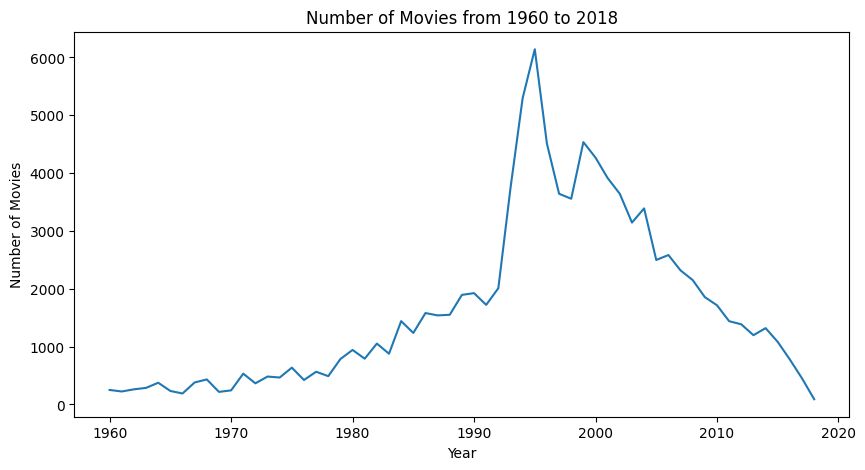

In [238]:
fig, ax = plt.subplots(figsize=(10,5))
x = year_counts.keys()
y = year_counts.values()
ax.plot(x, y)
ax.set_title("Number of Movies from 1960 to 2018")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")

# Data Exploration (`genres`)

In [239]:
# Counts of ratings per each genre
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(movies.loc[movies[genre] == 1])

genre_count

{'(no genres listed)': 0,
 'Action': 30635,
 'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Crime': 16681,
 'Documentary': 1219,
 'Drama': 41928,
 'Fantasy': 11834,
 'Film-Noir': 870,
 'Horror': 7291,
 'IMAX': 4145,
 'Musical': 4138,
 'Mystery': 7674,
 'Romance': 18124,
 'Sci-Fi': 17243,
 'Thriller': 26452,
 'War': 4859,
 'Western': 1930}

In [240]:
# 5 most reviewed movies
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:6]]
top_5_genres

['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance']

Text(0.5, 0.01, 'Rating')

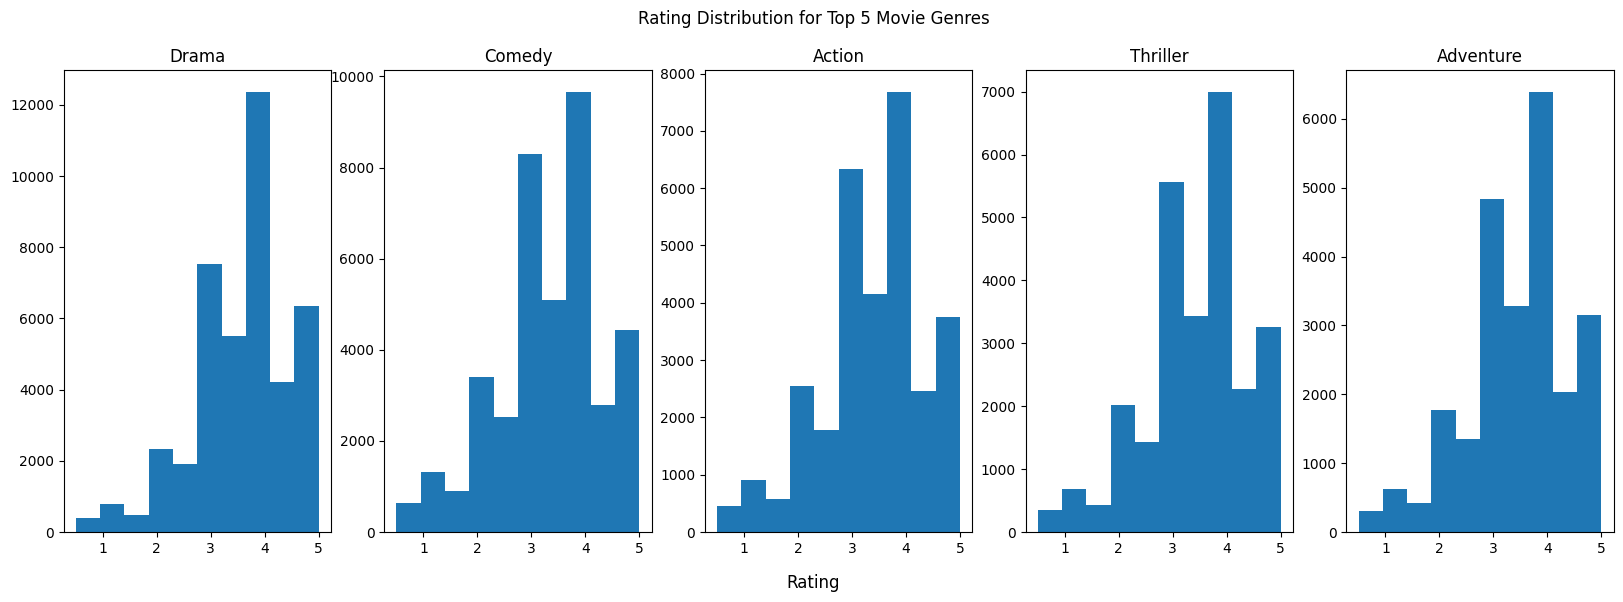

In [241]:
# Rating distribution of top 5 movie genres
fig, axes = plt.subplots(1,5, figsize=(20,6))

for i in range(5):
    genre = top_5_genres[i]
    axes[i].hist(movies.loc[movies[genre] == 1]['rating'])
    axes[i].set_title(genre)

fig.suptitle("Rating Distribution for Top 5 Movie Genres")
fig.supxlabel("Rating")


In [242]:
# Median ratings
for genre in genre_names:
    print(f"Median rating of {genre}: {movies.loc[movies[genre] == 1]['rating'].median()}")

Median rating of (no genres listed): nan
Median rating of Action: 3.5
Median rating of Adventure: 3.5
Median rating of Animation: 4.0
Median rating of Children: 3.5
Median rating of Comedy: 3.5
Median rating of Crime: 4.0
Median rating of Documentary: 4.0
Median rating of Drama: 4.0
Median rating of Fantasy: 3.5
Median rating of Film-Noir: 4.0
Median rating of Horror: 3.5
Median rating of IMAX: 4.0
Median rating of Musical: 3.5
Median rating of Mystery: 4.0
Median rating of Romance: 3.5
Median rating of Sci-Fi: 3.5
Median rating of Thriller: 3.5
Median rating of War: 4.0
Median rating of Western: 4.0


# Data Exploration (most rated movies)

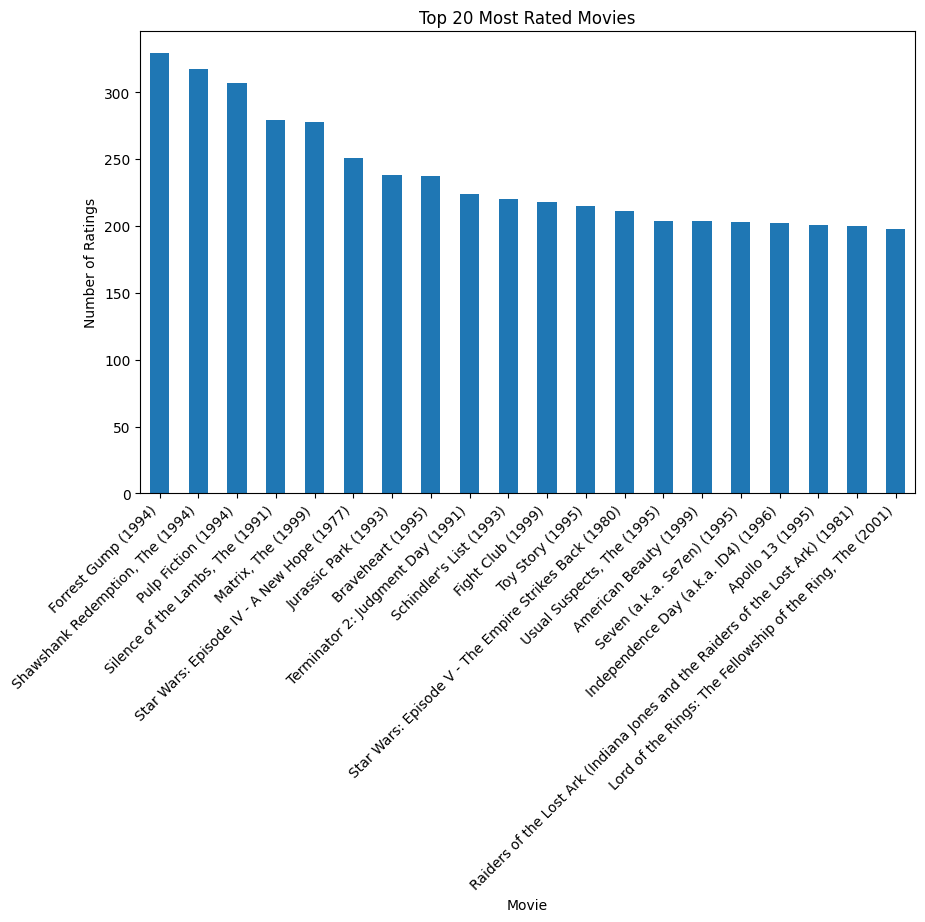

In [243]:
rating_counts = movies.groupby('title')['rating'].count()
plt.figure(figsize=(10, 6))
rating_counts.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Number of Ratings')
plt.title('Top 20 Most Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Feature Engineering (Genre Preference of Individual Users)

### To Recommend movies to a new user only with genre preference

Since our business problem is genre-driven, we want to see genre preference of individual users. We create a separate dataframe with each user as an entry, and all genres as variables. We calculate the median ratings for each genre from individual users. The **threshold** of preference is set as **4.0**, which means that the genre preference is considered when the median rating for a given genre is higher than 4.0. **1** from the final dataframe `genre_pref_df` represents genre preference.

In [244]:
# median values of individual users for each genre
median_ratings = {}
for genre in genre_names:
    median_ratings[genre] = movies.loc[movies[genre] == 1].groupby('userId')['rating'].median()

user_ratings_df = pd.DataFrame(median_ratings).reset_index()

user_ratings_df.head()

,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,NaN,4.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,...,5.0,4.00,NaN,5.0,5.0,4.0,4.00,4.0,5.0,4.0
1,2,NaN,4.0,4.0,NaN,NaN,4.0,4.0,5.0,4.0,...,NaN,3.00,3.75,NaN,4.0,4.5,3.75,4.0,4.5,3.5
2,3,NaN,4.5,3.0,0.5,0.5,0.5,0.5,NaN,0.5,...,NaN,4.75,NaN,0.5,5.0,0.5,5.00,5.0,0.5,NaN
3,4,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.5,4.00,3.00,4.0,4.0,3.5,2.50,4.0,4.0,4.0
4,5,NaN,3.0,3.0,4.5,4.0,3.0,4.0,NaN,4.0,...,NaN,3.00,3.00,5.0,4.0,3.0,2.50,4.0,4.0,3.0


In [245]:
# preprocess to get the genre preference

from sklearn.preprocessing import Binarizer

threshold = 4.0

# getting the genre columns only
genre_columns = user_ratings_df.drop(["userId", "(no genres listed)"], axis=1).fillna(0)

# fit and transform via Binarizer
binarizer = Binarizer(threshold=threshold, copy=True)
genre_columns = binarizer.fit_transform(genre_columns)

# genre columns with preference
genre_pref_df = pd.DataFrame(genre_columns, columns=binarizer.get_feature_names_out())

# user Id column
user_id = user_ratings_df['userId']

# concatenate both
genre_pref_df = pd.concat([user_ratings_df['userId'], genre_pref_df], axis=1)
genre_pref_df.head(10)

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Genre Preference from a New User

Let's add our new user to the genre preference matrix.

In [254]:
def add_new_user(new_user, df):
    
    new_user_df = pd.DataFrame(new_user, index=[0])
    new_genre_pref_df = pd.concat([df, new_user_df], axis=0).reset_index(drop=True)
    
    return new_genre_pref_df.fillna(0)

In [255]:
new_user = {'userId': 611, 'Action': 1, 'Adventure': 1, 'Mystery': 1}

new_genre_pref_df = add_new_user(new_user, genre_pref_df)

In [256]:
new_genre_pref_df.tail()

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
606,607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
607,608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# trying coefficients to find similar users
import numpy as np

target_user = 1

target_coef = pd.DataFrame(np.corrcoef(genre_pref_df.drop("userId", axis=1)))[target_user-1]
target_coef = target_coef.sort_values(ascending=False).fillna(0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [130]:
similar_users = [key for key, value in target_coef.items() if 0.7 <= value <= 1]


In [133]:
similar_users.remove(target_user-1)
similar_users

[]

Coefficient of 1 means that they are very highly correlated to each other, most likely having the same movie preference. One solution to the cold start problem is to recommend these highly similar users' most highly rated movies.

# Try `surprise` Recommender System

In [48]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset

reader = Reader()
knn_data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader=reader)

# train test split for knn because CV takes way too long...
train, test = train_test_split(knn_data, random_state=42)

sim_options = {'name': 'MSD', # 'pearson' and 'cosine' are other options
               'user_based': True
               }
knn = KNNBasic(sim_options = sim_options)


In [49]:
knn.fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [50]:
knn.test(test)

[Prediction(uid=414, iid=5425, r_ui=4.0, est=4.5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=380, iid=7293, r_ui=3.0, est=3.598970889980306, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=76, iid=2628, r_ui=2.0, est=3.034564180256252, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=608, iid=2541, r_ui=3.0, est=3.3455563907313075, details={'actual_k': 34, 'was_impossible': False}),
 Prediction(uid=79, iid=858, r_ui=5.0, est=4.692611947186484, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=290, iid=2391, r_ui=4.0, est=3.8425076736475035, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid=599, iid=6217, r_ui=1.5, est=4.5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=322, iid=2302, r_ui=3.5, est=3.0345672655261264, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=226, iid=3081, r_ui=2.5, est=3.5299981078175016, details={'actual_k': 40, 'was_impossi

In [51]:
import surprise

surprise.accuracy.mae(knn.test(test)) 

MAE:  0.7159


0.7158954350660606

In [52]:
user_id = 610
user_inner_id = train.to_inner_uid(user_id)
user_neighbors = knn.get_neighbors(user_inner_id, k=5)

In [53]:
user_neighbors
# Similar users to user 610 based on the ratings for adventure movies

[248, 278, 485, 194, 375]

In [88]:
import surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [89]:
reader = Reader()

In [90]:
data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader=reader)

In [91]:
train, test = surprise.model_selection.train_test_split(data, random_state=42)

In [92]:
svd = SVD(random_state=42)

In [93]:
cross_validate(svd, data, measures=['RMSE', 'MAE'])
# Here, we are fitting the whole data, not the train set
# because the surprice cross_validation is slightly different than regular sklearn CV

{'test_rmse': array([0.87518601, 0.87277137, 0.87536232, 0.87090627, 0.87141759]),
 'test_mae': array([0.67461129, 0.6681235 , 0.6741413 , 0.66893026, 0.6693248 ]),
 'fit_time': (0.6885130405426025,
  0.7381119728088379,
  0.6034951210021973,
  0.513070821762085,
  0.5035738945007324),
 'test_time': (0.05343008041381836,
  0.05466294288635254,
  0.04641318321228027,
  0.18959403038024902,
  0.04887104034423828)}

In [94]:
# If we don't want to use CV, but train test split instead
svd.fit(train)

In [95]:
svd.test(test)

In [120]:
# Model evaluation
surprise.accuracy.mae(svd.test(test))

MAE:  0.5247


0.5247365900259983

### Predicing ratings for all movies from one user (example is user ID 610)

In [581]:
movie_id = list(movies['movieId'].value_counts().index)

In [582]:
# predicting how user 610 would rate movie id 1
svd.predict(610, 1)

Prediction(uid=610, iid=1, r_ui=None, est=4.649688969682137, details={'was_impossible': False})

In [583]:
# predicting how user 610 would rate all of the movies
predictions = {}
for movie in movie_id:
    predictions[movie] = svd.predict(610, movie)[3] #610 is the user ID

predictions
# potentially get top 5 movies

{356: 4.2471219300672125,
 318: 4.68018994426493,
 296: 4.781159488067294,
 593: 4.660353124695765,
 2571: 4.993626482724927,
 260: 4.890443538148687,
 480: 4.472860866961986,
 110: 4.458643677621467,
 589: 4.682331854191646,
 527: 4.392155166793261,
 2959: 4.830194640906946,
 1: 4.649688969682137,
 1196: 5,
 50: 4.428628252621138,
 2858: 4.381407245515583,
 47: 4.457953401464559,
 780: 3.700534351427529,
 150: 4.291794652024219,
 1198: 4.851669074411871,
 4993: 4.8670772342982165,
 1210: 4.596933632516334,
 858: 4.835364596463592,
 457: 4.370511315248766,
 592: 4.233899279760537,
 5952: 4.567123390527243,
 2028: 4.838786080792239,
 7153: 4.729277936766621,
 588: 3.9806694441815034,
 608: 4.20903186539946,
 2762: 4.80146047819842,
 380: 3.722865219775202,
 32: 4.618331363600075,
 364: 4.552065510221284,
 1270: 4.443624051140103,
 377: 4.05094792153492,
 3578: 4.465716454793759,
 4306: 4.018093814640786,
 1580: 3.5566000841435974,
 590: 4.046474299259193,
 648: 3.82721921155441,
 344: 3

Compared to the KNN model, SVD model has smaller MAE metric. It predicts what the new user would rate for individual movies, based on the first movie rated by the new user. This model does not take the genre preference into account.